In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from datetime import datetime
from scipy import stats

In [92]:
rawData = pd.read_csv("WaterStocks.csv", parse_dates=True)
rawData['nplog'] = np.log(abs(rawData.PRC))
rawData.head()

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,...,SHROUT,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,nplog
0,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.000,30.0,29.25,1216,0.000000,...,3011,29.250,6.0,0.000000,-0.007358,-0.007403,0.001325,0.001294,-0.005036,3.375880
1,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,1850,0.000000,...,3011,30.000,5.0,0.000000,0.013491,0.013451,0.012477,0.012428,0.014952,3.375880
2,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,3226,0.000000,...,3011,29.250,8.0,0.000000,0.000697,0.000680,0.005099,0.005086,-0.000508,3.375880
3,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,29.75,2233,0.017094,...,3011,29.125,5.0,0.017094,0.007357,0.007305,0.007338,0.007329,0.007463,3.392829
4,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,30.00,2252,0.008403,...,3011,29.125,6.0,0.008403,-0.003754,-0.003971,0.004376,0.004304,-0.006399,3.401197


In [93]:
permno = [26463, 52898, 71475]

ind = rawData.PERMNO == permno[0]
ctwsData = rawData[ind]

ind = rawData.PERMNO == permno[1]
wtrData = rawData[ind]

ind = rawData.PERMNO == permno[2]
awrData = rawData[ind]

In [94]:
ctws_series = pd.Series(abs(ctwsData.nplog))
wtr_series = pd.Series(wtrData.nplog)
awr_series = pd.Series(awrData.nplog)

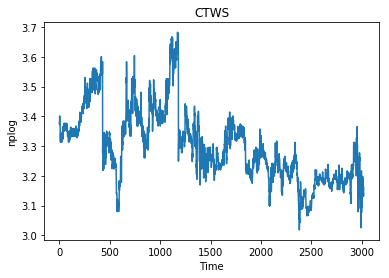

In [95]:
plt.plot(ctws_series)
plt.title('CTWS')
plt.xlabel('Time')
plt.ylabel('nplog');

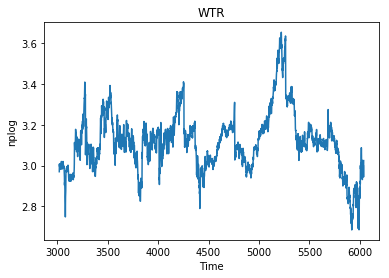

In [96]:
plt.plot(wtr_series)
plt.title('WTR')
plt.xlabel('Time')
plt.ylabel('nplog');

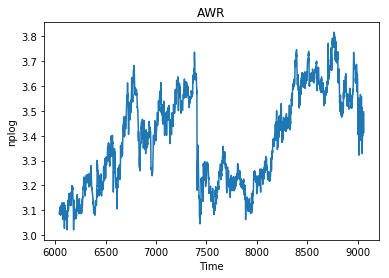

In [97]:
plt.plot(awr_series)
plt.title('AWR')
plt.xlabel('Time')
plt.ylabel('nplog');

__Separate Test Data and Trading Data__

In [98]:
rawData_first = rawData.loc[rawData['date'] < 20000101]
rawData_last = rawData.loc[rawData['date'] >= 20000101]

In [99]:
rawData_first.head()

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,...,SHROUT,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,nplog
0,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.000,30.0,29.25,1216,0.000000,...,3011,29.250,6.0,0.000000,-0.007358,-0.007403,0.001325,0.001294,-0.005036,3.375880
1,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,1850,0.000000,...,3011,30.000,5.0,0.000000,0.013491,0.013451,0.012477,0.012428,0.014952,3.375880
2,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.250,30.0,29.25,3226,0.000000,...,3011,29.250,8.0,0.000000,0.000697,0.000680,0.005099,0.005086,-0.000508,3.375880
3,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,29.75,2233,0.017094,...,3011,29.125,5.0,0.017094,0.007357,0.007305,0.007338,0.007329,0.007463,3.392829
4,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0,30.00,2252,0.008403,...,3011,29.125,6.0,0.008403,-0.003754,-0.003971,0.004376,0.004304,-0.006399,3.401197


In [100]:
permno = [26463, 52898, 71475]

ind = rawData_first.PERMNO == permno[0]
ctwsData_first = rawData_first[ind]

ind = rawData_first.PERMNO == permno[1]
wtrData_first = rawData_first[ind]

ind = rawData_first.PERMNO == permno[2]
awrData_first = rawData_first[ind]

In [101]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

In [102]:
rawData_first.reset_index(inplace=True)
rawData_last.reset_index(inplace=True)

ctwsData_first.reset_index(inplace=True)
wtrData_first.reset_index(inplace=True)
awrData_first.reset_index(inplace=True)
ctwsData_last.reset_index(inplace=True)
wtrData_last.reset_index(inplace=True)
awrData_last.reset_index(inplace=True)

__Exhibit 1 (Daily returns & Volume)__

__Returns__

In [103]:
ctwsData.RET.describe()

count    3020.000000
mean        0.000573
std         0.021245
min        -0.131115
25%        -0.009769
50%         0.000000
75%         0.010433
max         0.143689
Name: RET, dtype: float64

In [104]:
wtrData.RET.describe()

count    3020.000000
mean        0.000716
std         0.019450
min        -0.105691
25%        -0.009724
50%         0.000000
75%         0.010121
max         0.131258
Name: RET, dtype: float64

In [105]:
awrData.RET.describe()

count    3020.000000
mean        0.000624
std         0.020173
min        -0.097285
25%        -0.010573
50%         0.000000
75%         0.011236
max         0.096287
Name: RET, dtype: float64

__Volume__

In [106]:
ctwsData.VOL.describe()

count      3020.000000
mean       9956.748344
std       25544.115451
min           0.000000
25%        3459.000000
50%        6785.500000
75%       11747.250000
max      966638.000000
Name: VOL, dtype: float64

In [107]:
wtrData.VOL.describe()

count    3.020000e+03
mean     3.345267e+05
std      4.832983e+05
min      2.500000e+03
25%      4.010000e+04
50%      1.275500e+05
75%      4.258750e+05
max      5.578600e+06
Name: VOL, dtype: float64

In [108]:
awrData.VOL.describe()

count      3020.000000
mean      49990.043709
std       60350.785876
min         200.000000
25%       11900.000000
50%       27000.000000
75%       67125.000000
max      626300.000000
Name: VOL, dtype: float64

__Buy and Hold Return__

In [109]:
CTWS_hold = ((ctwsData_last.PRC.values[-2:-1][0] - ctwsData_last.PRC[0]) / ctwsData_last.PRC[0])
print("The buy and hold return for CTWS is: "+"{:.2%}".format(CTWS_hold));

The buy and hold return for CTWS is: -26.62%


In [110]:
WTR_hold = ((wtrData_last.PRC.values[-2:-1][0] - wtrData_last.PRC[0]) / wtrData_last.PRC[0])
print("The buy and hold return for WTR is: "+"{:.2%}".format(WTR_hold));

The buy and hold return for WTR is: -5.59%


In [111]:
AWR_hold = ((awrData_last.PRC.values[-2:-1][0] - awrData_last.PRC[0]) / awrData_last.PRC[0])
print("The buy and hold return for AWR is: "+"{:.2%}".format(AWR_hold));

The buy and hold return for AWR is: -15.69%


__CTWS test for unit-root__

In [112]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ctws_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.366696
p-value: 0.549971
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR test for unit-root__

In [113]:
result = adfuller(wtr_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.150078
p-value: 0.632169
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__AWR test for unit-root__

In [114]:
result = adfuller(awr_series, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.193496
p-value: 0.744843
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Looking at first differences__

In [115]:
first_dif_ctws = ctwsData.nplog.diff()
first_dif_wtr = wtrData.nplog.diff()
first_dif_awr = awrData.nplog.diff()

__CTWS first difference test__

In [116]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_ctws[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -46.494020
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR first difference test__

In [117]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_wtr[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -55.181402
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__AWR first difference test__

In [118]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_dif_awr[1:], maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -58.517293
p-value: 0.000000
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Testing for Cointegration__

In [119]:
reshaped_ctws = ctws_series.values.reshape(3020, 1)
reshaped_wtr = wtr_series.values.reshape(3020, 1)
reshaped_awr = awr_series.values.reshape(3020, 1)

__CTWS - WTR__

In [120]:
ols_result = sm.OLS(reshaped_ctws, reshaped_wtr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.870299
p-value: 0.000122
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__CTWS - AWR__

In [121]:
ols_result = sm.OLS(reshaped_ctws, reshaped_awr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.767085
p-value: 0.005513
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__WTR - AWR__

In [122]:
ols_result = sm.OLS(reshaped_wtr, reshaped_awr).fit()    
result = adfuller(ols_result.resid, maxlag=1, autolag='BIC', regression="nc")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.229168
p-value: 0.001248
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


__Error Correction Model__

__Between CTWS and WTR__

In [123]:
ols_result = sm.OLS(reshaped_ctws, reshaped_wtr).fit()    
result = sm.OLS(first_dif_ctws[1:], ols_result.resid[1:]).fit()

In [124]:
result.params

x1    0.006223
dtype: float64

In [125]:
np.mean(result.resid)

-0.00011387469146569553

_Equation(6) for each pair_

CTWS & WTR

In [126]:
print(f"Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(WTR)+epsilon")

Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(WTR)+epsilon


WTR and AWR

In [127]:
print(f"Equation(6) for WTR is log(WTR)=alpha+beta_1log(AWR)+epsilon")

Equation(6) for WTR is log(WTR)=alpha+beta_1log(AWR)+epsilon


CTWS and AWR

In [128]:
print(f"Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(AWR)+epsilon")

Equation(6) for CTWS is log(CTWS)=alpha+beta_1log(AWR)+epsilon


_Equation(7) for each pair_

CTWS and WTR

In [129]:
from sklearn.linear_model import LinearRegression

ctws_first_series = pd.Series(abs(ctwsData_first.nplog))
wtr_first_series = pd.Series(wtrData_first.nplog)
awr_first_series = pd.Series(awrData_first.nplog)

reshaped_ctws_first = ctws_first_series.values.reshape(757, 1)
reshaped_wtr_first = wtr_first_series.values.reshape(757, 1)
reshaped_awr_first = awr_first_series.values.reshape(757, 1)

model_ctws = LinearRegression(fit_intercept=True)
int_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).intercept_
coef_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).coef_
results = (int_ctws[0], coef_ctws[0][0])

In [130]:
print(f"Equation(7) for CTWS is log(CTWS)={results[0]:0.4f}{results[1]: 0.4f}log(WTR)")

Equation(7) for CTWS is log(CTWS)=3.5159-0.1212log(WTR)


WTR and AWR

In [131]:
model_wtr = LinearRegression(fit_intercept=True)
int_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).intercept_
coef_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).coef_
results = (int_wtr[0], coef_wtr[0][0])

In [132]:
print(f"Equation(7) for WTR is log(WTR)={results[0]:0.4f} +{results[1]: 0.4f}log(AWR)")

Equation(7) for WTR is log(WTR)=1.7561 + 0.4799log(AWR)


CTWS and AWR

In [133]:
model_awr = LinearRegression(fit_intercept=True)
int_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).intercept_
coef_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).coef_
results = (int_wtr[0], coef_wtr[0][0])

In [134]:
print(f"Equation(7) for CTWS is log(CTWS)={results[0]:0.4f} +{results[1]: 0.4f}log(AWR)")

Equation(7) for CTWS is log(CTWS)=1.7561 + 0.4799log(AWR)


_Running Equations 7&8 for each pair_

In [135]:
rawData_last['predicted'] = 0.0
predicted_value_ctws = np.empty(2263)
for i in range(0, 2263):
    predicted_value_ctws[i] = (int_awr[0] + (coef_awr[0,0] * awrData_last.loc[i]['nplog']))
    rawData_last.at[i, 'predicted'] = predicted_value_ctws[i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
predicted_value_wtr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_wtr[i] = (int_ctws[0] + (coef_ctws[0,0] * ctwsData_last.loc[i]['nplog']))
    rawData_last.at[(i+2263), 'predicted'] = predicted_value_wtr[i]

In [137]:
predicted_value_awr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_awr[i] = (int_wtr[0] + (coef_wtr[0,0] * wtrData_last.loc[i]['nplog']))
    rawData_last.at[(i+4526), 'predicted'] = predicted_value_awr[i]

In [139]:
rawData_last['dif_predicted'] = 0.0

for i in range(0, 6789):
    rawData_last['dif_predicted'][i] = rawData_last['nplog'][i] - rawData_last['predicted'][i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [140]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

In [141]:
multiple = [0.25, 0.50, 0.75]

CTWS $\sigma_\epsilon$ value

In [142]:
e_ctws = np.sqrt(np.var((ctwsData_last.dif_predicted)))

upper_bound_25_ctws = multiple[0] * e_ctws
lower_bound_25_ctws = -multiple[0] * e_ctws
upper_bound_50_ctws = multiple[1] * e_ctws
lower_bound_50_ctws = -multiple[1] * e_ctws
upper_bound_75_ctws = multiple[2] * e_ctws
lower_bound_75_ctws = -multiple[2] * e_ctws

WTR $\sigma_\epsilon$ value

In [143]:
e_wtr = np.sqrt(np.var((wtrData_last.dif_predicted)))

upper_bound_25_wtr = multiple[0] * e_wtr
lower_bound_25_wtr = -multiple[0] * e_wtr
upper_bound_50_wtr = multiple[1] * e_wtr
lower_bound_50_wtr = -multiple[1] * e_wtr
upper_bound_75_wtr = multiple[2] * e_wtr
lower_bound_75_wtr = -multiple[2] * e_wtr

AWR $\sigma_\epsilon$ value

In [144]:
e_awr = np.sqrt(np.var((awrData_last.dif_predicted)))

upper_bound_25_awr = multiple[0] * e_awr
lower_bound_25_awr = -multiple[0] * e_awr
upper_bound_50_awr = multiple[1] * e_awr
lower_bound_50_awr = -multiple[1] * e_awr
upper_bound_75_awr = multiple[2] * e_awr
lower_bound_75_awr = -multiple[2] * e_awr

CTWS strategy graph

In [145]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_25_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_25_ctws)

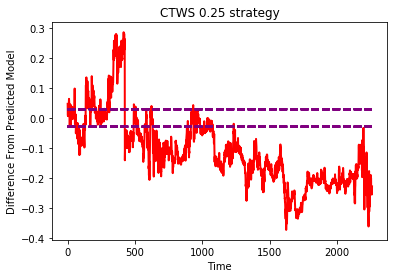

In [146]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [147]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_50_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_50_ctws)

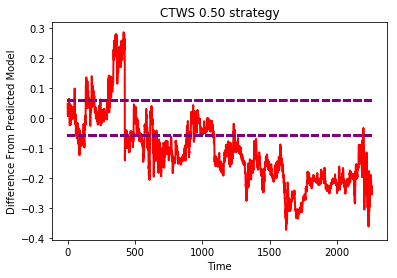

In [148]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [149]:
y = pd.Series(ctwsData_last.dif_predicted)

upper = np.empty(ctwsData_last.shape)
upper.fill(upper_bound_75_ctws)
lower = np.empty(ctwsData_last.shape)
lower.fill(lower_bound_75_ctws)

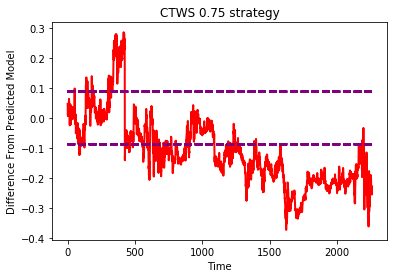

In [150]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('CTWS 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

WTR Strategy Graph

In [151]:
wtrData_last.reset_index(inplace=True)
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_25_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_25_wtr)

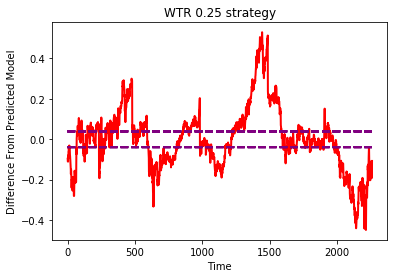

In [152]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [153]:
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_50_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_50_wtr)

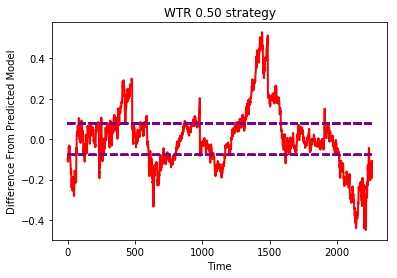

In [154]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [155]:
y = pd.Series(wtrData_last.dif_predicted)

upper = np.empty(wtrData_last.shape)
upper.fill(upper_bound_75_wtr)
lower = np.empty(wtrData_last.shape)
lower.fill(lower_bound_75_wtr)

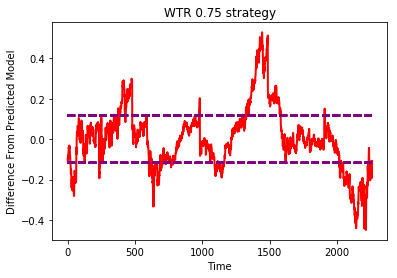

In [156]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('WTR 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

AWR Strategy Graph

In [157]:
awrData_last.reset_index(inplace=True)
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_25_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_25_awr)

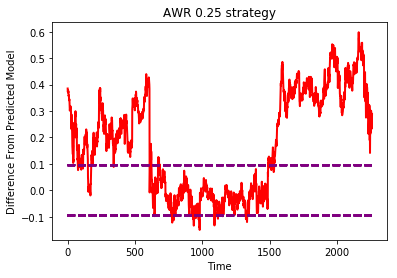

In [163]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.25 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [164]:
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_50_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_50_awr)

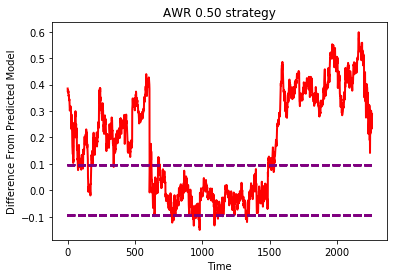

In [165]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.50 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

In [166]:
y = pd.Series(awrData_last.dif_predicted)

upper = np.empty(awrData_last.shape)
upper.fill(upper_bound_75_awr)
lower = np.empty(awrData_last.shape)
lower.fill(lower_bound_75_awr)

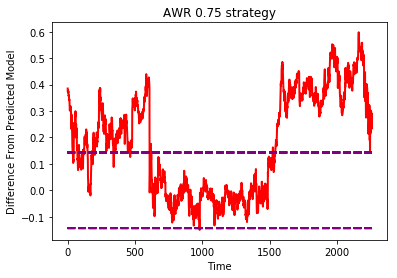

In [167]:
fig = plt.figure()
ax = plt.axes()

plt.plot(y, color="red", linewidth=2)
plt.plot(upper, color="purple", linewidth=2, linestyle='dashed')
plt.plot(lower, color="purple", linewidth=2, linestyle='dashed')
plt.title('AWR 0.75 strategy')
plt.xlabel('Time')
plt.ylabel('Difference From Predicted Model');

_Amount of signals for each pair_

CTWS

In [308]:
ctws_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [309]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [310]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_25_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_25_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [311]:
ctws_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
ctws_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

ctws_buy.reset_index(inplace=True)
ctws_exit_buy.reset_index(inplace=True)

ctws_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
ctws_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

ctws_sell.reset_index(inplace=True)
ctws_exit_sell.reset_index(inplace=True)

In [312]:
ctws_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Sell'] == 'YES')].count()[0]

In [263]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_50_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_50_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [264]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_50_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_50_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [265]:
ctws_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Sell'] == 'YES')].count()[0]

In [266]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_75_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_75_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [267]:
rawData_last['Sell'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] < lower_bound_75_ctws:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] < lower_bound_75_ctws:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [268]:
ctws_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Buy'] == 'YES')].count()[0]
ctws_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 1191) & (rawData_last['Sell'] == 'YES')].count()[0]

In [269]:
ctws_signals

,δi,Buy Signals,Sell Signals
0,0.25,15.0,9.0
1,0.50,6.0,7.0
2,0.75,4.0,6.0


WTR

In [270]:
wtr_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [271]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_25_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_25_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [ ]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

In [ ]:
wtr_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
wtr_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

wtr_buy.reset_index(inplace=True)
wtr_exit_buy.reset_index(inplace=True)

wtr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
wtr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

wtr_sell.reset_index(inplace=True)
wtr_exit_sell.reset_index(inplace=True)

In [276]:
wtr_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Sell'] == 'YES')].count()[0]

In [ ]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_50_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_50_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

In [ ]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_50_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_50_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

In [ ]:
wtr_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Sell'] == 'YES')].count()[0]

In [ ]:
rawData_last['Buy'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] > upper_bound_75_wtr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] > upper_bound_75_wtr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

In [ ]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_75_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_75_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

In [ ]:
wtr_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Buy'] == 'YES')].count()[0]
wtr_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 21397) & (rawData_last['Sell'] == 'YES')].count()[0]

In [277]:
wtr_signals

,δi,Buy Signals,Sell Signals
0,0.25,21.0,0.0
1,0.50,0.0,0.0
2,0.75,0.0,0.0


AWR

In [278]:
awr_signals = pd.DataFrame({'δi': (0.25, 0.50, 0.75), 'Buy Signals': (0.0, 0.0, 0.0), 'Sell Signals': (0.0, 0.0, 0.0)})

In [279]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_25_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_25_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [280]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_25_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_25_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [ ]:
awr_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
awr_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

awr_buy.reset_index(inplace=True)
awr_exit_buy.reset_index(inplace=True)

awr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
awr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

awr_sell.reset_index(inplace=True)
awr_exit_sell.reset_index(inplace=True)

In [281]:
awr_signals['Buy Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][0] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Sell'] == 'YES')].count()[0]

In [282]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_50_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_50_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [283]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_50_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_50_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [284]:
awr_signals['Buy Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][1] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Sell'] == 'YES')].count()[0]

In [285]:
rawData_last['Buy'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] > upper_bound_75_awr:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] > upper_bound_75_awr:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

In [286]:
rawData_last['Sell'] = 0

for i in range(4526, 4527):
    if rawData_last['dif_predicted'][i] < lower_bound_75_awr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(4527, 6789):
    if rawData_last['dif_predicted'][i] < lower_bound_75_awr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(i

In [287]:
awr_signals['Buy Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Buy'] == 'YES')].count()[0]
awr_signals['Sell Signals'][2] = rawData_last.loc[(rawData_last['PERMCO'] == 4350) & (rawData_last['Sell'] == 'YES')].count()[0]

In [289]:
awr_signals

,δi,Buy Signals,Sell Signals
0,0.25,10.0,12.0
1,0.50,5.0,6.0
2,0.75,4.0,1.0


_Length/Gain(Loss) of each first buy/sell_

Buy CTWS

In [313]:
ctws_buy['date'][0] = datetime.strptime(str(ctws_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
ctws_exit_buy['date'][0] = datetime.strptime(str(ctws_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

ctws_buy['date'][0] = datetime.strptime(ctws_buy['date'][0], "%Y/%m/%d")
ctws_exit_buy['date'][0] = datetime.strptime(ctws_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_ctws = abs((ctws_buy['date'][0] - ctws_exit_buy['date'][0]).days)

Profit_ctws = ctws_exit_buy['PRC'][0] - ctws_buy['PRC'][0]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\

22

In [328]:
print(f"The first buy trade at δ1 = 0.25 for CTWS was {Round_Trip_Buy_ctws:0.0f} days and resulted in a profit of ${Profit_ctws: 0.2f}")

The first buy trade at δ1 = 0.25 for CTWS was 22 days and resulted in a profit of $-2.25


Sell CTWS

In [314]:
ctws_sell['date'][0] = datetime.strptime(str(ctws_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
ctws_exit_sell['date'][0] = datetime.strptime(str(ctws_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

ctws_sell['date'][0] = datetime.strptime(ctws_sell['date'][0], "%Y/%m/%d")
ctws_exit_sell['date'][0] = datetime.strptime(ctws_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_ctws = abs((ctws_sell['date'][0] - ctws_exit_sell['date'][0]).days)

Profit_ctws = ctws_sell['PRC'][0] - ctws_exit_sell['PRC'][0]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\

104

In [329]:
print(f"The first sell trade at δ1 = 0.25 for CTWS was {Round_Trip_Sell_ctws:0.0f} days and resulted in a profit of ${Profit_ctws: 0.2f}")

The first sell trade at δ1 = 0.25 for CTWS was 104 days and resulted in a profit of $-2.25


Buy WTR

In [330]:
wtr_buy['date'][0] = datetime.strptime(str(wtr_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
wtr_exit_buy['date'][0] = datetime.strptime(str(wtr_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

wtr_buy['date'][0] = datetime.strptime(wtr_buy['date'][0], "%Y/%m/%d")
wtr_exit_buy['date'][0] = datetime.strptime(wtr_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_wtr = abs((wtr_buy['date'][0] - wtr_exit_buy['date'][0]).days)

Profit_wtr = wtr_exit_buy['PRC'][0] - wtr_buy['PRC'][0]

NameError: name 'wtr_buy' is not defined

In [ ]:
print(f"The first buy trade at δ1 = 0.25 for WTR was {Round_Trip_Buy_wtr:0.0f} days and resulted in a profit of ${Profit_wtr: 0.2f}")

Sell WTR

In [ ]:
wtr_sell['date'][0] = datetime.strptime(str(wtr_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
wtr_exit_sell['date'][0] = datetime.strptime(str(wtr_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

wtr_sell['date'][0] = datetime.strptime(wtr_sell['date'][0], "%Y/%m/%d")
wtr_exit_sell['date'][0] = datetime.strptime(wtr_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_wtr = abs((wtr_sell['date'][0] - wtr_exit_sell['date'][0]).days)

Profit_wtr = wtr_sell['PRC'][0] - wtr_exit_sell['PRC'][0]

In [ ]:
print(f"The first sell trade at δ1 = 0.25 for WTR was {Round_Trip_Sell_wtr:0.0f} days and resulted in a profit of ${Profit_wtr: 0.2f}")

Buy AWR

In [ ]:
awr_buy['date'][0] = datetime.strptime(str(awr_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
awr_exit_buy['date'][0] = datetime.strptime(str(awr_exit_buy['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

awr_buy['date'][0] = datetime.strptime(awr_buy['date'][0], "%Y/%m/%d")
awr_exit_buy['date'][0] = datetime.strptime(awr_exit_buy['date'][0], "%Y/%m/%d")

Round_Trip_Buy_awr = abs((awr_buy['date'][0] - awr_exit_buy['date'][0]).days)

Profit_awr = awr_exit_buy['PRC'][0] - awr_buy['PRC'][0]

In [ ]:
print(f"The first buy trade at δ1 = 0.25 for AWR was {Round_Trip_Buy_awr:0.0f} days and resulted in a profit of ${Profit_awr: 0.2f}")

Sell AWR

In [ ]:
awr_sell['date'][0] = datetime.strptime(str(awr_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')
awr_exit_sell['date'][0] = datetime.strptime(str(awr_exit_sell['date'][0]), '%Y%m%d').strftime('%Y/%m/%d')

awr_sell['date'][0] = datetime.strptime(awr_sell['date'][0], "%Y/%m/%d")
awr_exit_sell['date'][0] = datetime.strptime(awr_exit_sell['date'][0], "%Y/%m/%d")

Round_Trip_Sell_awr = abs((awr_sell['date'][0] - awr_exit_sell['date'][0]).days)

Profit_awr = awr_sell['PRC'][0] - awr_exit_sell['PRC'][0]

In [ ]:
print(f"The first sell trade at δ1 = 0.25 for AWR was {Round_Trip_Sell_awr:0.0f} days and resulted in a profit of ${Profit_awr: 0.2f}")

__This next part you don't have to look at and is the trading strategy, but I put in too much time and effort to just delete it__

__Intercepts and Coefficients__

In [36]:
ctws_first_series = pd.Series(abs(ctwsData_first.nplog))
wtr_first_series = pd.Series(wtrData_first.nplog)
awr_first_series = pd.Series(awrData_first.nplog)

reshaped_ctws_first = ctws_first_series.values.reshape(757, 1)
reshaped_wtr_first = wtr_first_series.values.reshape(757, 1)
reshaped_awr_first = awr_first_series.values.reshape(757, 1)

In [37]:
model_ctws = LinearRegression(fit_intercept=True)
int_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).intercept_
coef_ctws = model_ctws.fit(reshaped_ctws_first, reshaped_wtr_first).coef_

model_wtr = LinearRegression(fit_intercept=True)
int_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).intercept_
coef_wtr = model_wtr.fit(reshaped_wtr_first, reshaped_awr_first).coef_

model_awr = LinearRegression(fit_intercept=True)
int_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).intercept_
coef_awr = model_ctws.fit(reshaped_awr_first, reshaped_ctws_first).coef_

__Predicted Values__

In [38]:
rawData_last['predicted'] = 0.0
predicted_value_ctws = np.empty(2263)
for i in range(0, 2263):
    predicted_value_ctws[i] = (int_awr[0] + (coef_awr[0,0] * awrData_last.loc[i]['nplog']))
    rawData_last.at[i, 'predicted'] = predicted_value_ctws[i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
predicted_value_wtr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_wtr[i] = (int_ctws[0] + (coef_ctws[0,0] * ctwsData_last.loc[i]['nplog']))
    rawData_last.at[(i+2263), 'predicted'] = predicted_value_wtr[i]

In [40]:
predicted_value_awr = np.empty(2263)
for i in range(0, 2263):
    predicted_value_awr[i] = (int_wtr[0] + (coef_wtr[0,0] * wtrData_last.loc[i]['nplog']))
    rawData_last.at[(i+4526), 'predicted'] = predicted_value_awr[i]

__Difference From Predicted Values__

In [41]:
rawData_last['dif_predicted'] = 0.0

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(0, 6789):
    rawData_last['dif_predicted'][i] = rawData_last['nplog'][i] - rawData_last['predicted'][i]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
permno = [26463, 52898, 71475]

ind = rawData_last.PERMNO == permno[0]
ctwsData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[1]
wtrData_last = rawData_last[ind]

ind = rawData_last.PERMNO == permno[2]
awrData_last = rawData_last[ind]

__WTR & CTWS Strategy__

In [ ]:
multiple = [0.25, 0.50, 0.75]

__WTR Bounds__

In [ ]:
e_wtr = np.sqrt(np.var((wtrData_last.dif_predicted)))
np.mean(np.abs(wtrData_last.dif_predicted))

In [ ]:
upper_bound_25_wtr = multiple[0] * e_wtr
lower_bound_25_wtr = -multiple[0] * e_wtr
upper_bound_50_wtr = multiple[1] * e_wtr
lower_bound_50_wtr = -multiple[1] * e_wtr
upper_bound_75_wtr = multiple[2] * e_wtr
lower_bound_75_wtr = -multiple[2] * e_wtr

__CTWS Bounds__

In [48]:
e_ctws = np.sqrt(np.var((ctwsData_last.dif_predicted)))
np.mean(np.abs(ctwsData_last.dif_predicted))

0.13670592721226152

In [49]:
upper_bound_25_ctws = multiple[0] * e_ctws
lower_bound_25_ctws = -multiple[0] * e_ctws
upper_bound_50_ctws = multiple[1] * e_ctws
lower_bound_50_ctws = -multiple[1] * e_ctws
upper_bound_75_ctws = multiple[2] * e_ctws
lower_bound_75_ctws = -multiple[2] * e_ctws

__Amount of Shares to Short__

In [50]:
short_wtr_on_ctws = np.empty(3020)
for i in range(0, 3020):
    short_wtr_on_ctws[i] = 1000 * (ctwsData.nplog[i]/wtrData.nplog[i+3020])

In [51]:
short_ctws_on_wtr = np.empty(3020)
for i in range(0, 3020):
    short_ctws_on_wtr[i] = 1000 * (wtrData.nplog[i+3020]/ctwsData.nplog[i])

__Long CTWS Short WTR__

__Long CTWS Code__

In [52]:
rawData_last['Buy'] = 0

for i in range(0, 1):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        rawData_last['Buy'][i] = 'YES'
    else:
        rawData_last['Buy'][i] = 'NO'

for i in range(1, 2263):
    if rawData_last['dif_predicted'][i] > upper_bound_25_ctws:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData_last['Buy'][i] = 'HOLD BUY'
        else:
            rawData_last['Buy'][i] = 'YES'
    else:
        if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData_last['dif_predicted'][i] > 0:
                if rawData_last['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData_last['Buy'][i] = 'HOLD BUY'
                else:
                    rawData_last['Buy'][i] = 'NO'
            else:
                    rawData_last['Buy'][i] = 'EXIT BUY'
        else:
            rawData_last['Buy'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

__Long CTWS Results__

In [53]:
ctws_buy = rawData_last.loc[rawData_last['Buy'] == 'YES']
ctws_exit_buy = rawData_last.loc[rawData_last['Buy'] == 'EXIT BUY']

In [54]:
n = ctws_exit_buy.nplog.count()
ctws_buy_gains = np.empty(n)

for i in range(0, n):
    ctws_buy_gains[i] = (ctws_buy.PRC.values[i] - ctws_exit_buy.PRC.values[i]) / ctws_buy.PRC.values[i]

In [84]:
ctws_buy_gains.mean()

0.06352165741725663

__CTWS Round Trip Calculation__

In [ ]:
ctws_buy.reset_index(inplace=True)
ctws_exit_buy.reset_index(inplace=True)

In [56]:
for i in range(0, n):
    ctws_buy['date'][i] = datetime.strptime(str(ctws_buy['date'][i]), '%Y%m%d').strftime('%Y/%m/%d')
    
for i in range(0, n-1):
    ctws_exit_buy['date'][i] = datetime.strptime(str(ctws_exit_buy['date'][i]), '%Y%m%d').strftime('%Y/%m/%d')

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:

In [66]:
for i in range(0, n):
    ctws_buy['date'][i] = datetime.strptime(ctws_buy['date'][i], "%Y/%m/%d")
    ctws_exit_buy['date'][i] = datetime.strptime(ctws_exit_buy['date'][i], "%Y/%m/%d")

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: strptime() argument 1 must be str, not int

In [71]:
Round_Trip_ctws = np.empty(n)

for i in range(0, n-1):
    Round_Trip[i] = abs((ctws_buy['date'][i] - ctws_exit_buy['date'][i]).days)

Round_Trip_ctws = pd.DataFrame(Round_Trip_ctws)

__Short WTR Code__

In [86]:
rawData_last['Sell'] = 0

for i in range(2263, 2264):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        rawData_last['Sell'][i] = 'YES'
    else:
        rawData_last['Sell'][i] = 'NO'

for i in range(2264, 4526):
    if rawData_last['dif_predicted'][i] < lower_bound_25_wtr:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData_last['Sell'][i] = 'HOLD SELL'
        else:
            rawData_last['Sell'][i] = 'YES'
    else:
        if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData_last['dif_predicted'][i] < 0:
                if rawData_last['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData_last['Sell'][i] = 'HOLD SELL'
                else:
                    rawData_last['Sell'][i] = 'NO'
            else:
                    rawData_last['Sell'][i] = 'EXIT SELL'
        else:
            rawData_last['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer,

__Short WTR Results__

In [88]:
wtr_sell = rawData_last.loc[rawData_last['Sell'] == 'YES']
wtr_exit_sell = rawData_last.loc[rawData_last['Sell'] == 'EXIT SELL']

In [92]:
n = wtr_exit_sell.nplog.count()
wtr_sell_gains = np.empty(n)

for i in range(0, n):
    wtr_sell_gains[i] = (wtr_sell.PRC.values[i] - wtr_exit_sell.PRC.values[i]) / wtr_sell.PRC.values[i]

In [94]:
wtr_sell_gains.mean()

-0.069870968997243

__Long WTR Short CTWS__

__Long WTR Code__

In [ ]:
rawData['Buy'] = 0

for i in range(3020, 3021):
    if rawData['dif_predicted'][i] > upper_bound_25_wtr:
        rawData['Buy'][i] = 'YES'
    else:
        rawData['Buy'][i] = 'NO'

for i in range(3021, 6040):
    if rawData['dif_predicted'][i] > upper_bound_25_wtr:
        if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
            rawData['Buy'][i] = 'HOLD BUY'
        else:
            rawData['Buy'][i] = 'YES'
    else:
        if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
            if rawData['dif_predicted'][i] > 0:
                if rawData['Buy'][i-1] in ('YES', 'HOLD BUY'):
                    rawData['Buy'][i] = 'HOLD BUY'
                else:
                    rawData['Buy'][i] = 'NO'
            else:
                    rawData['Buy'][i] = 'EXIT BUY'
        else:
            rawData['Buy'][i] = 'NO'

__Long WTR Results__

In [47]:
wtr_buy = rawData.loc[rawData['Buy'] == 'YES']
wtr_exit_buy = rawData.loc[rawData['Buy'] == 'EXIT BUY']

In [48]:
n = wtr_exit_buy.nplog.count()
wtr_buy_gains = np.empty(n)

for i in range(0, n):
    wtr_buy_gains[i] = (wtr_buy.PRC.values[i] - wtr_exit_buy.PRC.values[i]) / wtr_buy.PRC.values[i]

__Short CTWS Code__

In [49]:
rawData['Sell'] = 0

for i in range(0, 1):
    if rawData['dif_predicted'][i] < lower_bound_25_ctws:
        rawData['Sell'][i] = 'YES'
    else:
        rawData['Sell'][i] = 'NO'

for i in range(3021, 6040):
    if rawData['dif_predicted'][i] < lower_bound_25_ctws:
        if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
            rawData['Sell'][i] = 'HOLD SELL'
        else:
            rawData['Sell'][i] = 'YES'
    else:
        if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
            if rawData['dif_predicted'][i] < 0:
                if rawData['Sell'][i-1] in ('YES', 'HOLD SELL'):
                    rawData['Sell'][i] = 'HOLD SELL'
                else:
                    rawData['Sell'][i] = 'NO'
            else:
                    rawData['Sell'][i] = 'EXIT SELL'
        else:
            rawData['Sell'][i] = 'NO'

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarn

__Short CTWS Results__

In [50]:
ctws_sell = rawData.loc[rawData['Sell'] == 'YES']
ctws_exit_sell = rawData.loc[rawData['Sell'] == 'EXIT SELL']

In [51]:
n = ctws_exit_sell.nplog.count()
ctws_sell_gains = np.empty(n)

for i in range(0, n):
    ctws_sell_gains[i] = (ctws_sell.PRC.values[i] - ctws_exit_sell.PRC.values[i]) / ctws_sell.PRC.values[i]

__Final Results__

In [52]:
data = [['L_CTWS', ctws_buy.nplog.count(), ctws_buy_gains.mean(), ctws_buy_gains.std(), 0, ctws_buy_gains.max(), ctws_buy_gains.min(), ctws_buy_gains.sum(), '-'],\
['S_WTR', wtr_sell.nplog.count(), wtr_sell_gains.mean(), wtr_sell_gains.std(), 0, wtr_sell_gains.max(), wtr_sell_gains.min(), wtr_sell_gains.sum(), '-'], \
['L_WTR', wtr_buy.nplog.count(), wtr_buy_gains.mean(), wtr_buy_gains.std(), 0, wtr_buy_gains.max(), wtr_buy_gains.min(), wtr_buy_gains.sum(), '-'],\
['S_CTWS', ctws_sell.nplog.count(), ctws_sell_gains.mean(), ctws_sell_gains.std(), 0, ctws_sell_gains.max(), ctws_sell_gains.min(), ctws_sell_gains.sum(), ctws_buy_gains.sum() + wtr_sell_gains.sum() + wtr_buy_gains.sum() + ctws_sell_gains.sum()]] 
  
results = pd.DataFrame(data, columns = ['Position', 'Count', 'Mean', 'St. Dev', 'Median', 'Max', 'Min', 'Position Total', 'Strategy Total']) 

In [53]:
results

,Position,Count,Mean,St. Dev,Median,Max,Min,Position Total,Strategy Total
0,L_CTWS,31,0.055750,0.021524,0,0.119862,0.021739,1.728249,-
1,S_WTR,30,-0.074494,0.042570,0,-0.038763,-0.236246,-2.160332,-
2,L_WTR,35,0.069018,0.029969,0,0.180371,0.040000,2.415645,-
3,S_CTWS,34,-0.065089,0.039385,0,-0.036919,-0.236246,-2.147935,-0.164374
